In [1]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

from LaneDetection import LaneDetection
from Camera import Camera

In [2]:
lka = LaneDetection()

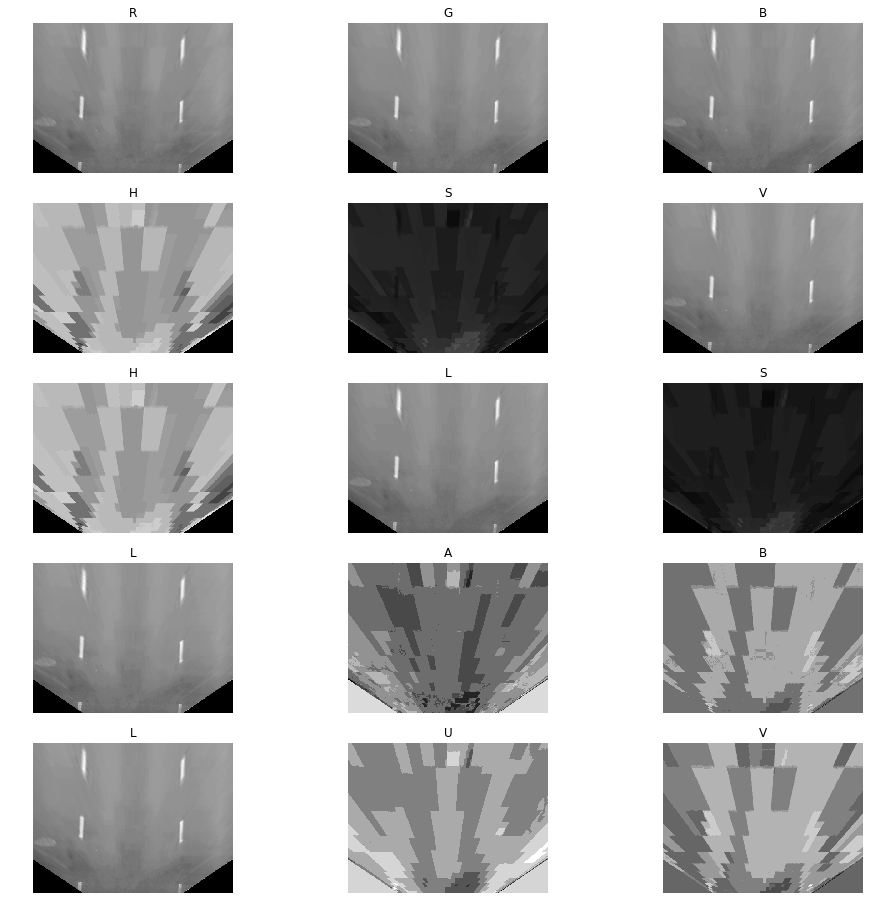

In [3]:
# sampleRoadImgs = glob.glob("./samples/road_samples_1/warped/*.png")

# for image in sampleRoadImgs:
fig = plt.figure(figsize=(16, 16))
columns = 3
rows = 5
# imgRGB = cv2.imread(image)
# imgBGR = cv2.imread("./samples/road_samples_1/warped/yellow_white_sample_warped.png")
imgBGR = cv2.imread("./test-videos/snapshots/snap4.png")
imgBGR = lka.camera.perspective_transform(imgBGR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

imgRGB_R, imgRGB_G, imgRGB_B = cv2.split(imgBGR)

imgHSV = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)
imgHSV_H, imgHSV_S, imgHSV_V = cv2.split(imgHSV)

imgHLS = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HLS)
imgHLS_H, imgHLS_L, imgHLS_S = cv2.split(imgHLS)

imgLUV = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2LUV)
imgLUV_L, imgLUV_U, imgLUV_V = cv2.split(imgLUV)

imgLAB = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2LAB)
imgLAB_L, imgLAB_A, imgLAB_B = cv2.split(imgLAB)

subRGB_R = fig.add_subplot(rows, columns, 1)
subRGB_R.axis('off')
subRGB_R.set_title('R')
plt.imshow(imgRGB_R, cmap='gray')
subRGB_G = fig.add_subplot(rows, columns, 2)
subRGB_G.axis('off')
subRGB_G.set_title('G')
plt.imshow(imgRGB_G, cmap='gray')
subRGB_B = fig.add_subplot(rows, columns, 3)
subRGB_B.axis('off')
subRGB_B.set_title('B')
plt.imshow(imgRGB_B, cmap='gray')

subHSV_H = fig.add_subplot(rows, columns, 4)
subHSV_H.axis('off')
subHSV_H.set_title('H')
plt.imshow(imgHSV_H, cmap='gray')
subHSV_S = fig.add_subplot(rows, columns, 5)
subHSV_S.axis('off')
subHSV_S.set_title('S')
plt.imshow(imgHSV_S, cmap='gray')
subHSV_V = fig.add_subplot(rows, columns, 6)
subHSV_V.axis('off')
subHSV_V.set_title('V')
plt.imshow(imgHSV_V, cmap='gray')

subHLS_H = fig.add_subplot(rows, columns, 7)
subHLS_H.axis('off')
subHLS_H.set_title('H')
plt.imshow(imgHLS_H, cmap='gray')
subHLS_L = fig.add_subplot(rows, columns, 8)
subHLS_L.axis('off')
subHLS_L.set_title('L')
plt.imshow(imgHLS_L, cmap='gray')
subHLS_S = fig.add_subplot(rows, columns, 9)
subHLS_S.axis('off')
subHLS_S.set_title('S')
plt.imshow(imgHLS_S, cmap='gray')

subLAB_L = fig.add_subplot(rows, columns, 10)
subLAB_L.axis('off')
subLAB_L.set_title('L')
plt.imshow(imgLAB_L, cmap='gray')
subLAB_A = fig.add_subplot(rows, columns, 11)
subLAB_A.axis('off')
subLAB_A.set_title('A')
plt.imshow(imgLAB_A, cmap='gray')
subLAB_B = fig.add_subplot(rows, columns, 12)
subLAB_B.axis('off')
subLAB_B.set_title('B')
plt.imshow(imgLAB_B, cmap='gray')

subLUV_L = fig.add_subplot(rows, columns, 13)
subLUV_L.axis('off')
subLUV_L.set_title('L')
plt.imshow(imgLUV_L, cmap='gray')
subLUV_U = fig.add_subplot(rows, columns, 14)
subLUV_U.axis('off')
subLUV_U.set_title('U')
plt.imshow(imgLUV_U, cmap='gray')
subLUV_V = fig.add_subplot(rows, columns, 15)
subLUV_V.axis('off')
subLUV_V.set_title('V')
plt.imshow(imgLUV_V, cmap='gray')

plt.show()

In [4]:
def lowThreshFun(wHigh, img, lowThresh, title):
    if wHigh.result is not None:
        _, imgThresh = cv2.threshold(img, lowThresh, wHigh.result, cv2.THRESH_BINARY)
        fig = plt.figure()
        subP = fig.add_subplot(1, 1, 1)
        subP.axis('off')
        subP.set_title(title)
        plt.imshow(imgThresh)

def setHighT_RGB_R(highThresh):
    return highThresh

def setLowT_RGB_R(lowThresh):
    lowThreshFun(wRGB_R_high, imgRGB_R, lowThresh, 'RGB_R')
    return lowThresh

def setHighT_RGB_G(highThresh):
    return highThresh

def setLowT_RGB_G(lowThresh):
    lowThreshFun(wRGB_G_high, imgRGB_G, lowThresh, 'RGB_G')
    return lowThresh

def setHighT_RGB_B(highThresh):
    return highThresh

def setLowT_RGB_B(lowThresh):
    lowThreshFun(wRGB_B_high, imgRGB_B, lowThresh, 'RGB_B')
    return lowThresh

def setHighT_HSV_S(highThresh):
    return highThresh

def setLowT_HSV_S(lowThresh):
    lowThreshFun(wHSV_S_high, imgHSV_S, lowThresh, 'HSV_S')
    return lowThresh

def setHighT_HSV_V(highThresh):
    return highThresh

def setLowT_HSV_V(lowThresh):
    lowThreshFun(wHSV_V_high, imgHSV_V, lowThresh, 'HSV_V')
    return lowThresh

def setHighT_HLS_L(highThresh):
    return highThresh

def setLowT_HLS_L(lowThresh):
    lowThreshFun(wHLS_L_high, imgHLS_L, lowThresh, 'HLS_L')
    return lowThresh

def setHighT_HLS_S(highThresh):
    return highThresh

def setLowT_HLS_S(lowThresh):
    lowThreshFun(wHLS_S_high, imgHLS_S, lowThresh, 'HLS_S')
    return lowThresh

def setHighT_LAB_L(highThresh):
    return highThresh

def setLowT_LAB_L(lowThresh):
    lowThreshFun(wLAB_L_high, imgLAB_L, lowThresh, 'LAB_L')
    return lowThresh

def setHighT_LAB_B(highThresh):
    return highThresh

def setLowT_LAB_B(lowThresh):
    lowThreshFun(wLAB_B_high, imgLAB_B, lowThresh, 'LAB_B')
    return lowThresh

def setHighT_LUV_L(highThresh):
    return highThresh

def setLowT_LUV_L(lowThresh):
    lowThreshFun(wLUV_L_high, imgLUV_L, lowThresh, 'LUV_L')
    return lowThresh

def setHighT_LUV_U(highThresh):
    return highThresh

def setLowT_LUV_U(lowThresh):
    lowThreshFun(wLUV_U_high, imgLUV_U, lowThresh, 'LUV_U')
    return lowThresh

def setHighT_LUV_V(highThresh):
    return highThresh

def setLowT_LUV_V(lowThresh):
    lowThreshFun(wLUV_V_high, imgLUV_V, lowThresh, 'LUV_V')
    return lowThresh


wRGB_R_high = interactive(setHighT_RGB_R, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
wRGB_R_low = interactive(setLowT_RGB_R, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=135))
display(wRGB_R_high, wRGB_R_low)

# wRGB_G_high = interactive(setHighT_RGB_G, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wRGB_G_low = interactive(setLowT_RGB_G, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=170))
# display(wRGB_G_high, wRGB_G_low)

# wRGB_B_high = interactive(setHighT_RGB_B, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wRGB_B_low = interactive(setLowT_RGB_B, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=180))
# display(wRGB_B_high, wRGB_B_low)

# wHSV_S_high = interactive(setHighT_HSV_S, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wHSV_S_low = interactive(setLowT_HSV_S, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=145))
# display(wHSV_S_high, wHSV_S_low)

wHSV_V_high = interactive(setHighT_HSV_V, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
wHSV_V_low = interactive(setLowT_HSV_V, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=145))
display(wHSV_V_high, wHSV_V_low)

wHLS_L_high = interactive(setHighT_HLS_L, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
wHLS_L_low = interactive(setLowT_HLS_L, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=135))
display(wHLS_L_high, wHLS_L_low)

# wHLS_S_high = interactive(setHighT_HLS_S, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wHLS_S_low = interactive(setLowT_HLS_S, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=115))
# display(wHLS_S_high, wHLS_S_low)

wLAB_L_high = interactive(setHighT_LAB_L, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
wLAB_L_low = interactive(setLowT_LAB_L, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=145))
display(wLAB_L_high, wLAB_L_low)

# wLAB_B_high = interactive(setHighT_LAB_B, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wLAB_B_low = interactive(setLowT_LAB_B, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=155))
# display(wLAB_B_high, wLAB_B_low)

wLUV_L_high = interactive(setHighT_LUV_L, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
wLUV_L_low = interactive(setLowT_LUV_L, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=173))
display(wLUV_L_high, wLUV_L_low)

# wLUV_U_high = interactive(setHighT_LUV_U, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wLUV_U_low = interactive(setLowT_LUV_U, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=112))
# display(wLUV_U_high, wLUV_U_low)

# wLUV_V_high = interactive(setHighT_LUV_V, highThresh=widgets.IntSlider(min=0,max=255,step=1,value=255))
# wLUV_V_low = interactive(setLowT_LUV_V, lowThresh=widgets.IntSlider(min=0,max=255,step=1,value=170))
# display(wLUV_V_high, wLUV_V_low)


interactive(children=(IntSlider(value=255, description='highThresh', max=255), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=135, description='lowThresh', max=255), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=255, description='highThresh', max=255), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=145, description='lowThresh', max=255), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=255, description='highThresh', max=255), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=135, description='lowThresh', max=255), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=255, description='highThresh', max=255), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=145, description='lowThresh', max=255), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=255, description='highThresh', max=255), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=173, description='lowThresh', max=255), Output()), _dom_classes=('widget…

In [5]:
snap_img = cv2.imread("./test-videos/snapshots/snap4.png")

[-1.17885026e-04  6.53575696e-03  1.62755263e+02]


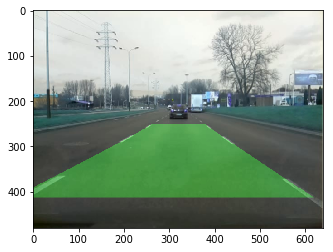

In [6]:
img_marked = lka.process(snap_img)
plt.imshow(img_marked)

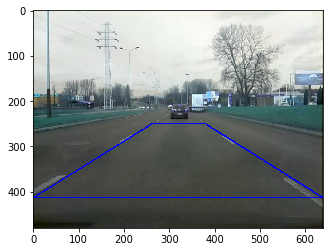

In [7]:
img_roi = lka.camera.mark_roi(snap_img)
plt.imshow(img_roi)

In [8]:
cap = cv2.VideoCapture("./test-videos/records/rec_1.avi")

out = cv2.VideoWriter("./test-videos/results/res_1.mp4", cv2.VideoWriter_fourcc('M','J','P','G'), 30, lka.camera.get_image_size())

# win = cv2.namedWindow("video_process_output", cv2.WINDOW_AUTOSIZE)

#check if video file was opened
if not cap.isOpened():
    print("Error opening a file")
else:
    num = 1
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
#             frame = cv2.flip(frame, -1)
            processed_frame = lka.process(frame)
            out.write(processed_frame)
            print(num)
            num += 1
            # cv2.imshow("video_process_output", frame)
        else:
            break

    cap.release()
    out.release()
    # cv2.destroyAllWindows()

[0 0 0]
1
[0 0 0]
2
[-1.02986562e-04  2.62031453e-02  1.98839179e+02]
3
[-6.47638039e-05  2.37839381e-02  1.95723792e+02]
4
[0 0 0]
5
[0 0 0]
6
[0 0 0]
7
[0 0 0]
8
[0 0 0]
9
[ 7.45366374e-05 -2.85746698e-02  1.75299812e+02]
10
[-5.13238863e-05  1.03519934e-02  1.69329716e+02]
11
[0 0 0]
12
[-4.12374753e-05 -1.22268472e-02  1.61472443e+02]
13
[0 0 0]
14
[ 2.17229879e-04 -1.50725448e-01  1.82339444e+02]
15
[0 0 0]
16
[-8.03200694e-04  2.66187294e-01  1.37513612e+02]
17
[ 2.39166025e-04 -1.94432100e-01  1.92125176e+02]
18
[0 0 0]
19
[0 0 0]
20
[0 0 0]
21
[-1.32611143e-04 -6.17672154e-02  1.85974612e+02]
22
[0 0 0]
23
[ 6.48092990e-05 -1.19655229e-01  1.93634624e+02]
24
[ 4.68645808e-05 -1.12927312e-01  1.92710021e+02]
25
[0 0 0]
26
[0 0 0]
27
[0 0 0]
28
[-1.38166907e-04 -4.89628237e-02  2.02922039e+02]
29
[0 0 0]
30
[-6.09782794e-06 -6.37657658e-02  1.91980858e+02]
31
[ 1.92318509e-05 -6.23977683e-02  1.86921780e+02]
32
[-3.18852451e-05 -5.89590335e-02  1.90579598e+02]
33
[-1.12975950e-05